In [31]:
from fastai import *
from fastai.vision.all import *
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import os
from shutil import copyfile
import glob
import pandas as pd
import matplotlib.pyplot as plt
import shutil

In [5]:
%pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [29]:
os.mkdir("/kaggle/working/resnet_data")

In [30]:
os.mkdir("/kaggle/working/resnet_data/anger")
os.mkdir("/kaggle/working/resnet_data/happiness")
os.mkdir("/kaggle/working/resnet_data/neutral")
os.mkdir("/kaggle/working/resnet_data/sadness")

In [32]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

file_names = list_files("/kaggle/input/resnet-imeocap-data/resnet_data")

In [33]:
for input_file in file_names:
    src_path = input_file
    dst_path = "/kaggle/working/resnet_data/" + input_file.split("/kaggle/input/resnet-imeocap-data/resnet_data/")[1]
    shutil.copy(src_path, dst_path)

In [37]:
np.random.seed(42)
data = ImageDataLoaders.from_folder("/kaggle/working/resnet_data", train='.', valid_pct=0.2,
        ds_tfms=None, size=[400,600], num_workers=4)

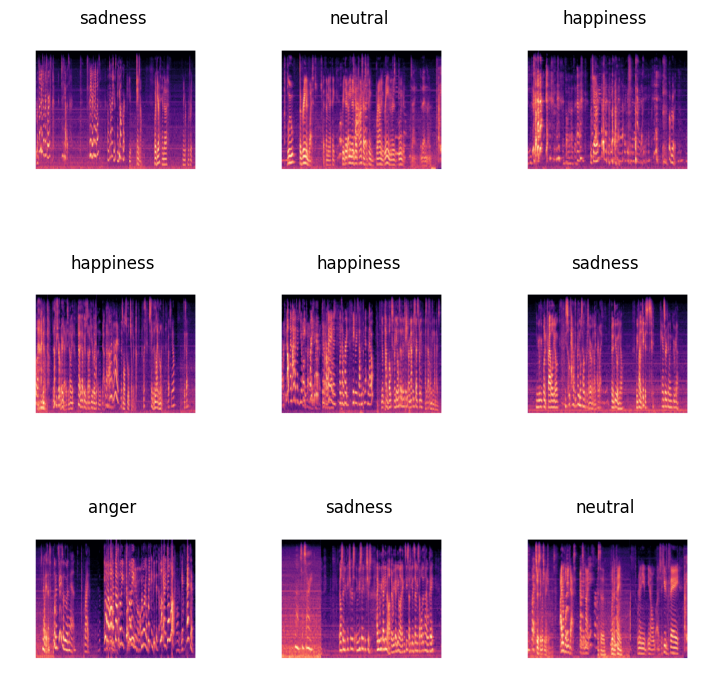

In [38]:
data.show_batch()

In [39]:
# learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


AttributeError: 'Sequential' object has no attribute 'plot'

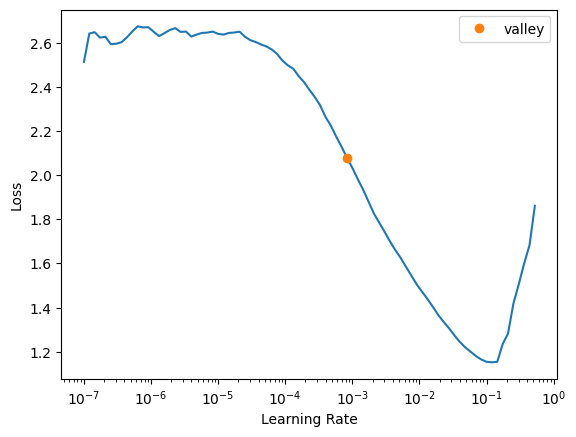

In [40]:
learn.lr_find()
learn.recorder.plot()

# Pick learning rate where curve is maximally decreasing

# Fit last layer of the model 

In [41]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.716731,0.157163,0.953422,01:35
1,0.239259,0.059112,0.978137,01:35
2,0.103721,0.043017,0.986692,01:35
3,0.053423,0.025987,0.992395,01:35
4,0.036425,0.024014,0.992395,01:35


In [42]:
learn.save('stage-1-rn34')

Path('/kaggle/working/resnet_data/models/stage-1-rn34.pth')

# Unfreeze first layers, assess loss wrt learning rate and train full model 

In [43]:
learn.load('stage-1-rn34')

In [44]:
learn.unfreeze()

SuggestedLRs(valley=4.786300905834651e-06)

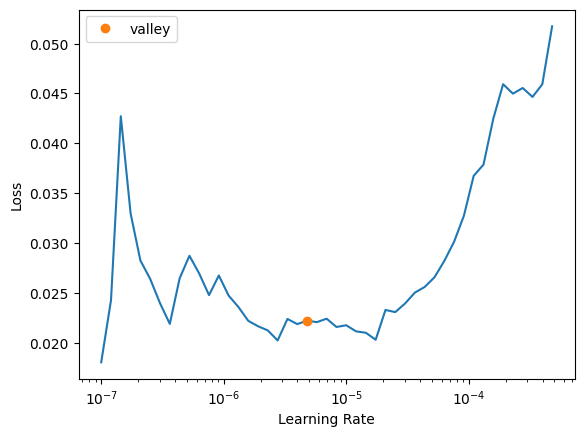

In [45]:
learn.lr_find()
# learn.recorder.plot()

In [49]:
learn.fit_one_cycle(10, slice(4.786300905834651e-06, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.021289,0.020464,0.995247,02:05
1,0.026458,0.075639,0.973384,02:04
2,0.019355,0.013242,0.996198,02:04
3,0.009926,0.017030,0.995247,02:04
4,0.006212,0.014749,0.997148,02:04
5,0.006844,0.018389,0.997148,02:03
6,0.002605,0.013392,0.997148,02:03
7,0.000816,0.008611,0.998099,02:03
8,0.000384,0.009697,0.997148,02:03
9,0.000317,0.009098,0.998099,02:04


In [50]:
learn.save('stage-2-rn34')

Path('/kaggle/working/resnet_data/models/stage-2-rn34.pth')

# Confusion matrix

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

In [52]:
interp.most_confused(min_val=2)

[]

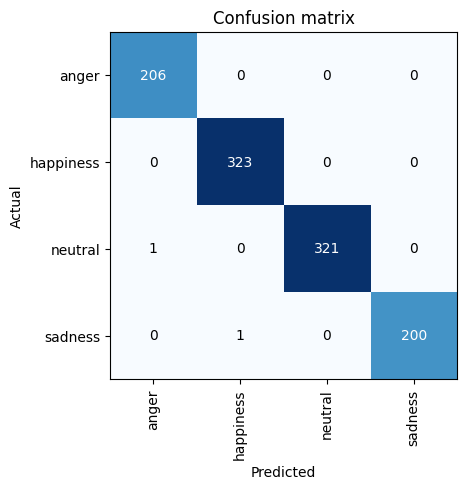

In [53]:
interp.plot_confusion_matrix()